Pontos esperados:

1. Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.
2. Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes.
3. Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados.
4. Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?
5. Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.
6. Que outras bases externas ou internas voce buscaria para enriquecer as análises?

In [1]:
!pip install inflection
!pip install missingno

In [2]:
import missingno as msno
import pandas as pd
import numpy as np
import inflection
import math 
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.colors as mcolors
import seaborn as sns

%matplotlib inline


sales = pd.read_csv('train.csv')
print(sales.shape)
#teste = pd.read_csv('test.csv')
#print(teste.shape)
stores=pd.read_csv("store.csv")
print(stores.shape)
sales=sales.merge(stores, how="inner", on="Store")
print(sales.shape)

C:\Users\joao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1017209, 9)
(1115, 10)
(1017209, 18)


In [3]:
oldCols=list(sales.columns)
snakecase=lambda x: inflection.underscore(x)
newCols=list(map(snakecase, oldCols))
#print(newCols)

sales.columns = newCols
sales.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

In [5]:
sales.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [6]:
sales["date"]=pd.to_datetime(sales["date"]).dt.date
sales.info()

#stamp.strftime('%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

<AxesSubplot:>

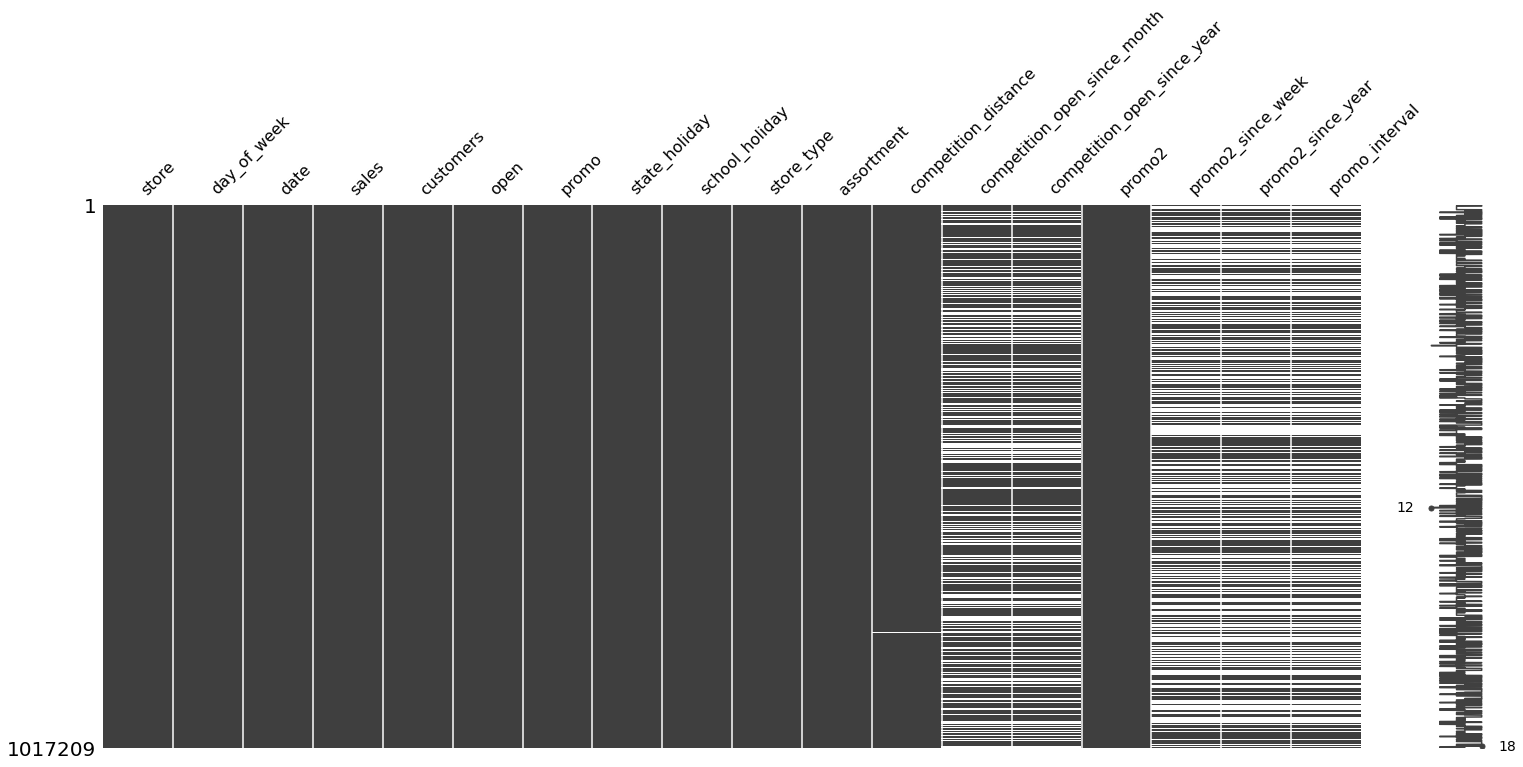

In [7]:
msno.matrix(sales)

<AxesSubplot:>

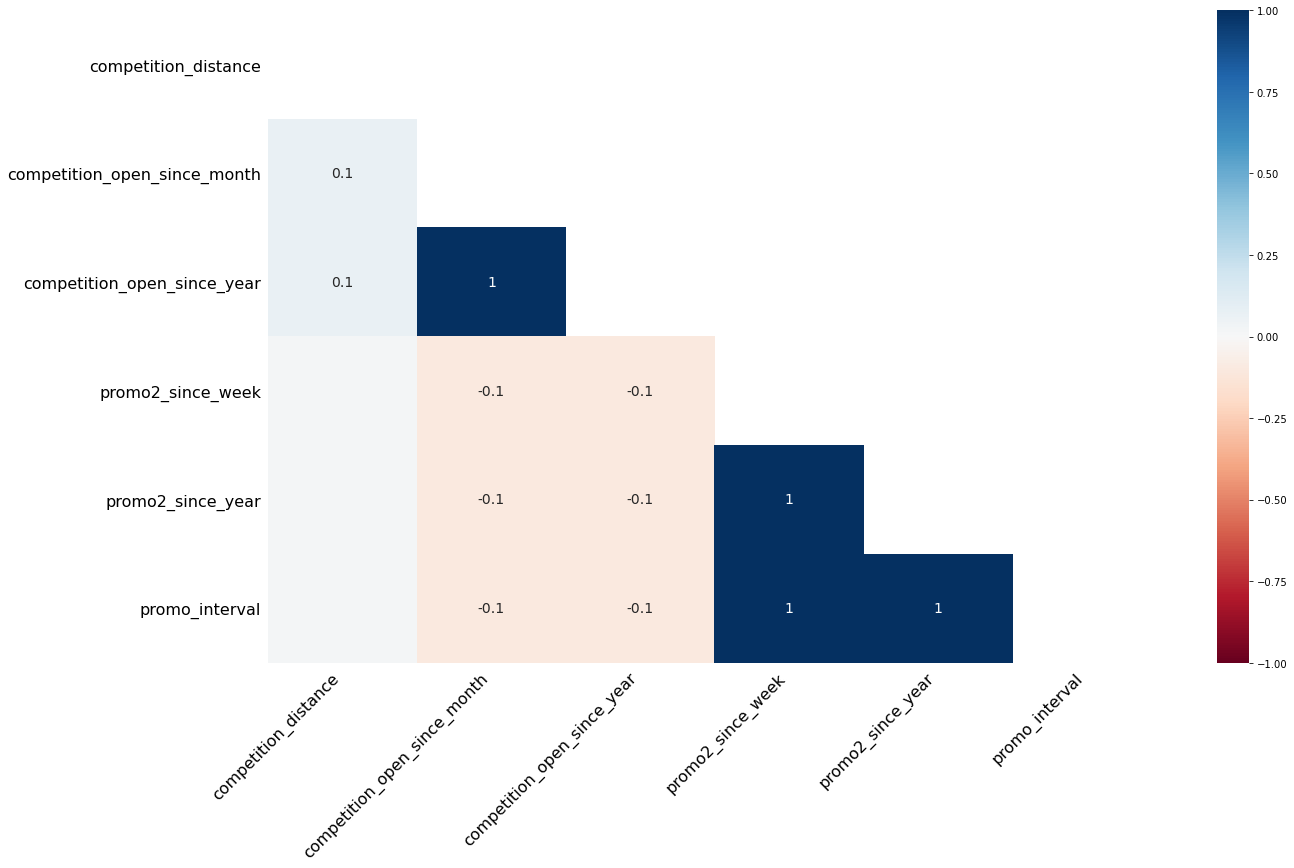

In [8]:
msno.heatmap(sales)

In [9]:
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
sales["state_holiday"].replace({"a": "public_holiday", "b": "easter_holiday", "c": "christmas", "0": "None", 0: "None"}, inplace=True)
print(sales.state_holiday.unique())
sales.head(1000)

['None' 'public_holiday' 'easter_holiday' 'christmas']


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,2015-06-08,3918,501,1,0,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
996,2,7,2015-06-07,0,0,0,0,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
997,2,6,2015-06-06,2641,319,1,0,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
998,2,5,2015-06-05,4938,532,1,1,None,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [10]:
sales.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [11]:
sales["competition_distance"].fillna(sales["competition_distance"].max(), inplace = True)
sales.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [12]:
#Colunas excluídas 
print(sales.shape)
sales.drop(["assortment", "competition_open_since_month"], axis=1, inplace=True)
print(sales.shape)

(1017209, 18)
(1017209, 16)


In [13]:
sales.groupby("store")["date"].transform(lambda x: x.min().year)

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: date, Length: 1017209, dtype: int64

In [14]:
mask=sales["competition_open_since_year"].isna()
#sales.loc[mask, 'competition_open_since_year'] = sales.loc[mask, "date"].apply(lambda x: x.year)
sales.loc[mask, 'competition_open_since_year'] = 2013
sales.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,competition_distance,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN


In [15]:
sales['promo2_since_year'].replace(np.nan, 0, inplace=True)
sales['promo2_since_year'] = sales['promo2_since_year'].astype(np.int32)
sales.isna().sum()

store                               0
day_of_week                         0
date                                0
sales                               0
customers                           0
open                                0
promo                               0
state_holiday                       0
school_holiday                      0
store_type                          0
competition_distance                0
competition_open_since_year         0
promo2                              0
promo2_since_week              508031
promo2_since_year                   0
promo_interval                 508031
dtype: int64

In [16]:
print(sales["promo_interval"].unique())
sales["promo_interval"].replace(np.nan, "None", inplace=True)
sales.isna().sum()

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


store                               0
day_of_week                         0
date                                0
sales                               0
customers                           0
open                                0
promo                               0
state_holiday                       0
school_holiday                      0
store_type                          0
competition_distance                0
competition_open_since_year         0
promo2                              0
promo2_since_week              508031
promo2_since_year                   0
promo_interval                      0
dtype: int64

In [17]:
sales.drop(["promo2_since_week"], axis=1, inplace=True)
sales.isna().sum()

store                          0
day_of_week                    0
date                           0
sales                          0
customers                      0
open                           0
promo                          0
state_holiday                  0
school_holiday                 0
store_type                     0
competition_distance           0
competition_open_since_year    0
promo2                         0
promo2_since_year              0
promo_interval                 0
dtype: int64

<AxesSubplot:>

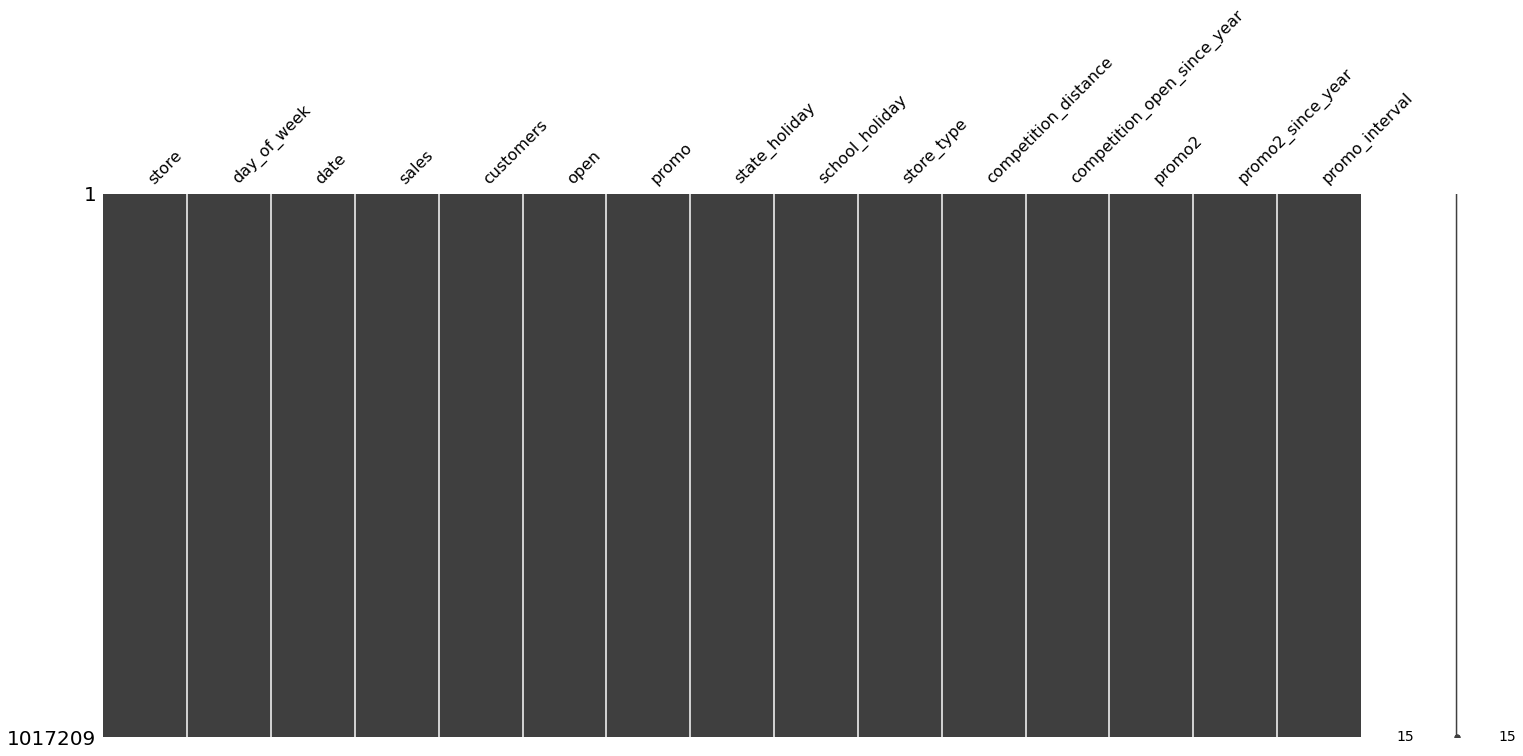

In [18]:
msno.matrix(sales)

Perguntas

In [19]:
# Qual loja fez mais vendas?
#sales.groupby("store")["sales"].sum().sort_values(ascending=False)
sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).head(1)

,sales
store,
262,19516842


NameError: name 'EngFormatter' is not defined

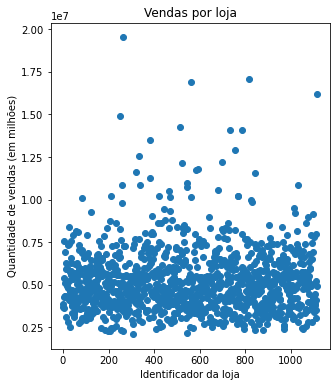

In [20]:
fig, ax=plt.subplots(figsize=(5, 6))
mean_cs = sales.pivot_table(index='store', values='sales', aggfunc='sum')
plt.scatter(mean_cs.index, mean_cs['sales']);
ax.set_title("Vendas por loja")
ax.set_ylabel("Quantidade de vendas (em milhões)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

C:\Users\joao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


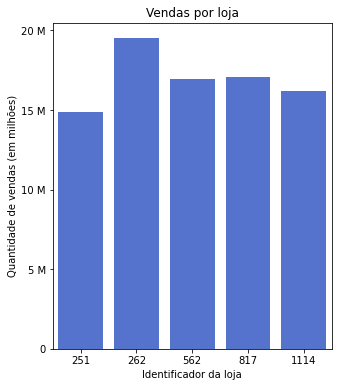

In [31]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import EngFormatter
#matplotlib.style.use('tableau-colorblind10')
#matplotlib.style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).head(5)
clrs = ['grey' if (x < max(df)) else 'royalblue' for x in df]
sns.barplot(df.index, df.sales, ci=None, estimator=sum, palette=clrs)
ax.set_title("Vendas por loja")
ax.set_ylabel("Quantidade de vendas (em milhões)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
#ax.yaxis.set_major_formatter(FormatStrFormatter("%.f"))
ax.set_yticks(np.arange(0, 25000000, step=5000000));
plt.show()

C:\Users\joao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


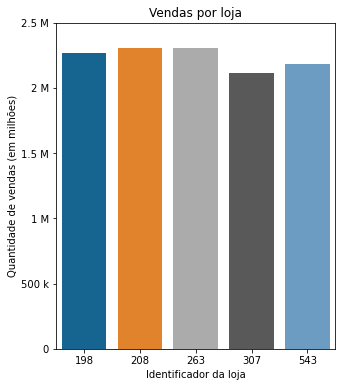

In [26]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import EngFormatter
matplotlib.style.use('tableau-colorblind10')
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).tail(5)
sns.barplot(df.index, df.sales, ci=None, estimator=sum)
ax.set_title("Vendas por loja")
ax.set_ylabel("Quantidade de vendas (em milhões)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
ax.set_ylim(0, 2500000)
ax.set_yticks(np.arange(0, 3000000, step=500000))
plt.show()

In [ ]:
# Qual loja tem a maior média de clientes?
sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).iloc[0, :]
sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).head(1)

In [ ]:
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).head(5)
sns.barplot(df.index, df.customers, ci=None, estimator=sum)
ax.set_title("Média de clientes por loja")
ax.set_ylabel("Quantidade de clientes (em milhares)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).tail(5)
sns.barplot(df.index, df.customers, ci=None, estimator=sum)
ax.set_title("Média de clientes por loja")
ax.set_ylabel("Quantidade de clientes")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

In [ ]:
# Qual a média de clientes por loja?
sales.groupby("store")[["customers"]].mean()

In [ ]:
fig, ax=plt.subplots(figsize=(5, 6))
mean_cs = sales.pivot_table(index='store', values='customers', aggfunc='mean')
plt.scatter(mean_cs.index, mean_cs['customers']);
ax.set_title("Média de clientes por loja")
ax.set_ylabel("Quantidade de clientes (em milhares)")
ax.set_xlabel("Identificador da loja")
ax.yaxis.set_major_formatter(EngFormatter())
plt.show()

In [ ]:
#import scipy.stats as stats
#g=sns.jointplot(x="customers", y="sales", data=sales, kind="reg", joint_kws={'line_kws':{'color':'cyan'}})
#r, p=stats.pearsonr(sales.customers, sales.sales)
#phantom,=g.ax_joint.plot([], [], linestyle="", alpha=0)
#g.ax_joint.legend([phantom],["r={:f}, p-value={:f}".format(r, p)])

In [ ]:
# Qual loja passou mais dias com produtos em promoção?
sales.groupby("store")[["promo"]].sum().sort_values("promo",ascending=False).head(15)

In [ ]:
sns.heatmap(sales.promo,cmap='coolwarm');
# 360 dias em promoção num período aproximado de 3 anos ou 1.095 dias, média de 120 dias ou 32% do ano em promoção.

In [ ]:
sns.catplot(data=sales, x="year", y="sales", kind="bar", estimator=sum, ci=None)

In [ ]:
# Qual foi o total de vendas por ano?
import matplotlib
matplotlib.style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(5, 6))
df=sales.groupby('year')[['sales']].sum()
ax.bar(df.index, df.sales)
ax.plot(df.index, df.sales, linestyle='-', marker='o', color="gray")
ax.set_title("Vendas por ano")
ax.set_ylabel("Quantidade de vendas (em bilhões)")
ax.set_xlabel("Ano")
ax.set_xticks(np.arange(2013, 2016, step=1))
#ax.yaxis.set_major_formatter(EngFormatter())
ax.legend(["Vendas"])
plt.show()

In [ ]:
#Média de vendas mensal

sales_year = sales.pivot_table(index='month', values='sales', aggfunc='mean') 

plt.figure(figsize=(12,8))

ax = sns.lineplot(x=sales_year.index, y=sales_year['sales'])
ax.legend(['Vendas'])
ax.set_title('Média de vendas mensais')
ax.set_ylabel('Quantidade de vendas')
ax.set_xlabel('Mês')
ax.set_xticks(np.arange(1, 13, step=1))
ax.set_label('');


In [ ]:
# Qual loja passou mais dias com produtos em promoção num ano?
sales["year"]=sales["date"].apply(lambda x: x.year)
sales.groupby(["year", "store"])[["promo"]].sum().sort_values("promo",ascending=False).head(15)Ê

In [ ]:
# Qual dia da semana é mais provável de ocorrer uma promoção?
sales.loc[sales['promo']==1, 'day_of_week'].value_counts() # dias 6 e 7 não tem promoção

In [ ]:
sns.histplot(data=sales.loc[sales['promo']==1], x='day_of_week', bins=5);

In [ ]:
# Em qual feriado as vendas são maiores, natal ou páscoa?
mask=sales["state_holiday"].isin(["easter_holiday", "christmas"])
sales.loc[mask].groupby(['state_holiday', 'year'])[['sales']].sum().sort_values("sales", ascending=False).head(5)

In [ ]:
# Qual loja conseguiu mais vendas num único mês?
sales["month"]=sales["date"].apply(lambda x: x.month)
sales.groupby(['year', 'month','store'])[['sales']].max().sort_values('sales',ascending=False).head(1)

In [ ]:
# Qual a loja com o máximo de clientes num determinado dia da semana e ano?
sales.groupby(['store', 'year','day_of_week'])[['customers']].max().sort_values("customers", ascending=False).head(5)

In [ ]:
# Qual o número máximo, mínimo, e mediana de clientes que o grupo atendeu num dia?
sales['day']=sales['date'].apply(lambda x: x.day)
sales.groupby(['year','month','day'])[['customers']].agg('sum').sort_values("customers", ascending=False).head(15)
#sales.groupby(['year','month','day'])[['customers']].agg('').sort_values("customers", ascending=True).head()

In [ ]:
sales.groupby(['year','month','day'])[['customers']].agg('sum').sort_values("customers", ascending=True).head(15)

In [ ]:
sales.groupby(['year','month','day'])[['customers']].agg('sum').median()

In [ ]:
# Tem mais vendas/clientes com promoção ou sem promoção?
sales.groupby("promo")["sales", "customers"].mean().rename(mapper={0:"sem promo", 1:"com promo"})

In [ ]:
# Tem mais vendas com promoção ou sem promoção?
sales.groupby("promo")["sales"].describe()

In [ ]:
sales['date'].head()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=43c508c6-91f9-4c07-8f9a-b0e96ce9285e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>